#TEAM89

# Data from api of REDDIT
**Import libraries Required**

In [26]:
import requests
import json
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**We bring the data from the REDDIT social network.**

Here we use the query variable to indicate what we want to search on and fetch the data from reddit.

In [27]:
query="BTC+DOWN" #Define Your Query
url = f"https://api.pushshift.io/reddit/search/comment/?q={query}"
request = requests.get(url)
json_response = request.json()
json_response

def get_pushshift_data(data_type, **kwargs):
    """
    Gets data from the pushshift api.
 
    data_type can be 'comment' or 'submission'
    The rest of the args are interpreted as payload.
 
    Read more: https://github.com/pushshift/api
    """
 
    base_url = f"https://api.pushshift.io/reddit/search/{data_type}/"
    payload = kwargs
    request = requests.get(base_url, params=payload)
    return request.json()

    
data_type="comment"     # give me comments, use "submission" to publish something
#query="war"          # Add your query
duration="365d"          # Select the timeframe. Epoch value or Integer + "s,m,h,d" (i.e. "second", "minute", "hour", "day")
size=1000               # maximum 1000 comments
sort_type="score"       # Sort by score (Accepted: "score", "num_comments", "created_utc")
sort="desc"             # sort descending
aggs="subreddit"        #"author", "link_id", "created_utc", "subreddit"

get_pushshift_data(data_type=data_type,     
                   q=query,                 
                   after=duration,          
                   size=size,               
                   sort_type=sort_type,
                   sort=sort)

    
# Call the API
data = get_pushshift_data(data_type=data_type,
                          q=query,
                          after="1d",
                          size=100000,
                          sort_type=sort_type,
                          sort=sort).get("data")
 
# Select the columns you care about
df = pd.DataFrame.from_records(data)[["author", "subreddit", "score", "body", "permalink","created_utc"]]

# Keep the first 400 characters
df['texto'] = df['body'].str[0:400] + "..."
 
# Append the string to all the permalink entries so that we have a link to the comment
df['permalink'] = "https://reddit.com" + df['permalink'].astype(str)
 
 
# Create a function to make the link to be clickable and style the last column
def make_clickable(val):
    """ Makes a pandas column clickable by wrapping it in some html.
    """
    return '<a href="{}">Link</a>'.format(val,val)
 
 
df.style.format({'permalink': make_clickable})
df['date'] = pd.to_datetime(df['created_utc'],  unit='s')


In [32]:
# Delete the body column
df1 = df.drop(['body'], axis=1) 

Timestamp('2022-05-25 04:44:21')

In [20]:
df = df1

**We define a function to remove HTML tags**

In [17]:
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

df.texto = df.texto.apply(striphtml)
df['temporal'] = ''

**We clean the texts of the dataframe field('Texto')**

we make several transformations to the text in order to remove words that are not necessary for this we tokenize the words in the text, such as articles, change to lowercase,
we remove unneeded words from the English language, and we remove non-alphabetic characters.
finally we convert the resulting list into a character string

In [18]:
for i in range(len(df)):
    df['temporal'][i] = sent_tokenize(df.iloc[i]['texto']) 
    for y in range (len( df['temporal'][i])):
        words = word_tokenize(df['temporal'][i][y])
    words = [w.lower() for w in words]
    stop_words =  stopwords.words('english')
    words = [w for w in words if not w in stop_words and w.isalpha()]
    df['temporal'][i] = " ".join(words)

<ipython-input-18-2b8ce1d10a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temporal'][i] = sent_tokenize(df.iloc[i]['texto'])
<ipython-input-18-2b8ce1d10a13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temporal'][i] = " ".join(words)


**We create the cloud with the most frequent words**

First we delete the null values, and then we take all the texts and create the word cloud

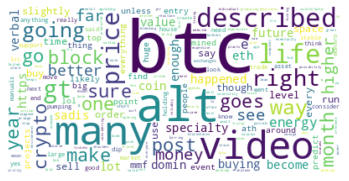

In [19]:
#Removing NaN Values
df.dropna(inplace = True)
#Creating the text variable
text = " ".join(texto for texto in df.temporal)
# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()